# The Quantum Harmonic Oscillator: A Simulation Journey

Welcome! In this notebook, we're going to interactively learn how to simulate the Quantum Harmonic Oscillator (QHO). By the end, you'll be able to solve for its energy levels, visualize its wavefunctions, and even watch them evolve in time, all using Python.

### Why simulating?
Analytic solutions are great, but many real-world quantum systems (like atoms in cavities or superconducting circuits) are too complex for pen and paper. Simulations let us play with these systems to build intuition, plotting helps you get a feel for concepts quickly.

### Prerequisites
We assume you know some basic Python (variables, loops, functions). If you're rusty, check out [ThinkPython](https://allendowney.github.io/ThinkPython/). We'll teach you the libraries (`numpy`, `matplotlib`, `qutip`) as we go.

---

## Part 0: Setup and Imports

First, let's grab the tools we need. Run the cell below. If you get an error, you may need to install the packages via in the terminal.

`pip install numpy matplotlib plotly qutip scipy`

alternatively, in one of the cells, type:

`!pip install numpy matplotlib plotly qutip scipy`


In [ ]:
!pip install numpy matplotlib plotly qutip scipy nbformat ipykernel

In [ ]:
!pip install --upgrade nbformat

In [1]:
# Sometimes in python 3.12> you might face issues with plotly
# this resolves one such error

import base64
base64.encodestring = base64.encodebytes
base64.decodestring = base64.decodebytes

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from scipy.special import eval_hermite, factorial
from scipy.linalg import expm

import qutip as qp

# Setting up a nice theme for plots
plt.style.use('seaborn-v0_8-darkgrid')

import nbformat
print(nbformat.__version__)


5.10.4


## Part 1: Absolute basics - Working with vectors and matrices

Quantum Mechanics is effectively "Linear Algebra with fancy notation". To simulate it, we need a library that handles vectors and matrices efficiently. Enter **NumPy**.

In QM, a state $|\psi\rangle$ is a vector. Operators like $\hat{x}$ or $\hat{H}$ are matrices.

### Challenge 1.1: Vectors and Inner Products
Create two vectors, `v1` and `v2`. Calculate their inner product (dot product). In bra-ket notation, this is $\langle v1 | v2 \rangle$.

In [ ]:
import numpy as np
# See the numpy version (not necessary, just to introduce)
print(np.__version__)

# Documentation!
print(np.__doc__)

In [ ]:
# To see the methods available for a class, use dir()
print(dir(np))

In [ ]:
# EXERCISE: Create two numpy arrays representing vectors
# v1 = np.array([ ... ]) 

# TIP: when in doubt, use:
# print(np.array.__doc__) for the documentation!
# or google it!

# v2 = ...
# Calculate dot product using np.dot(v1, v2) or v1 @ v2

# Your code here:


--- 
## Part 2: The Quantum Harmonic Oscillator Refresher

Recall the Hamiltonian for a harmonic oscillator:
$$\hat{H} = \hbar\omega \left(\hat{a}^\dagger \hat{a} + \frac{1}{2}\right)$$

The operators $\hat{a}$ (annihilation) and $\hat{a}^\dagger$ (creation) act on the number states $|n\rangle$ as:
$$ \hat{a}|n\rangle = \sqrt{n} |n-1\rangle $$
$$ \hat{a}^\dagger|n\rangle = \sqrt{n+1} |n+1\rangle $$

We can't simulate an *infinite* Hilbert space on a computer. So we **truncate** it. We pick a maximum number of photons, say $N=20$. 
Our basis states are $|0\rangle, |1\rangle, \dots, |N-1\rangle$.

## Part 3: Matrix Mechanics

Let's build these operators from scratch as matrices. 

The annihilation operator $\hat{a}$ in the number basis has elements:
$$ \hat{a}_{mn} = \langle m | \hat{a} | n \rangle = \sqrt{n} \delta_{m, n-1} $$

This means the matrix has $\sqrt{1}, \sqrt{2}, \dots$ on the first upper diagonal.

In [ ]:
# EXERCISE: Construct the annihilation operator matrix
N = 5 # Dimension of our Hilbert space

def create_annihilation_op(dim):
    # Hint: np.diag can create a matrix with a given diagonal
    # The diagonal we want is k=1 (upper diagonal)
    # Values are sqrt(1), sqrt(2), ..., sqrt(dim-1)
    pass

# a_op = create_annihilation_op(N)
# print(a_op)

QuTiP is a popular quantum physics library in Python. It provides tools for simulating quantum systems, including quantum optics and quantum computing. We will introduce the use of QuTiP as well to make our lives easier. 

We will also implement a lot of the basic ideas in numpy to understand what QuTiP does under the hood and to get a feel of the underlying math/ physics.

In [ ]:
print(qp.destroy.__doc__)

In [ ]:
# Using QuTiP to see the annihilation and creation operators
import qutip as qp
N = 5

a = qp.destroy(N)
print("Annihilation operator:")
print(a)
print('\n', '---'*10, '\n')

# does the result match your numpy definition?

print("Creation operator:")
print(a.dag())
print('\n', '---'*10, '\n')
print("Alternatively, you could also define it using: ")
print(qp.create(N))


### Challenge 3.2: The Hamiltonian and Commutation
Using your `a_op`, create the creation operator `adag_op` (it's just the conjugate transpose!). Then construct $\hat{H}$.

Also, check the commutation relation: $[\hat{a}, \hat{a}^\dagger] = \mathbb{I}$. 
**Question:** Does it hold exactly given we truncated the space?

In [ ]:
# EXERCISE
# 1. Define adag_op using .conj().T
# 2. Calculate H = hbar_omega * (adag @ a + 0.5 * Identity)
#    Assume hbar * omega = 1 for simplicity
# 3. Calculate commutator C = a @ adag - adag @ a
# 4. Check if C is equal to Identity (np.eye(N)). Where does it fail?

# Your code here:

In [ ]:
print(qp.commutator.__doc__)

In [27]:
# Using QuTiP to verify the commutation relations of the HO
N = 5

a = qp.destroy(N)
adag = qp.create(N)
C = qp.commutator(a, adag, kind = 'normal')
print(C) 

# alternatively you could multiply the operators and subtract
# C = qp.destroy(N)*qp.create(N) - qp.create(N)*qp.destroy(N) 
# print(C)

# Notice a crucial difference between numpy and qutip
# In QuTiP: * does matrix multiplication but in Numpy @ does matrix multiplication
# In Numpy, * does elementwise multiplication

# Is this what you saw in your numpy implementation?
# Is this what you expect from theory?

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0. -4.]]


### Challenge 3.3: Finding Eigenenergies
Now, use `np.linalg.eigh` (Hermitian eigendecomposition) to find the eigenvalues of $\hat{H}$. 
You should expect to see $0.5, 1.5, 2.5, \dots$.

In [ ]:
# EXERCISE: Compute eigenvalues of H
# evals, evecs = np.linalg.eigh(H)
# print("First 5 energies:", evals[:5])

In [ ]:
print(qp.plot_energy_levels.__doc__)

In [ ]:
# The QuTiP equivalent:
N = 5

# 2. Define annihilation and creation operators
a = qp.destroy(N)
adag = a.dag()

# 3. Define the Hamiltonian
# H = hbar * omega * (a^dagger a + 1/2)
# We set hbar * omega = 1 for dimensionless units
H = adag * a + 0.5 * qp.qeye(N)

# Plot the energy levels
qp.plot_energy_levels(H_list=[H], N=N) # args: list of hamiltonians, number of states to plot


--- 
## Part 4: Visualizing Wavefunctions (Position Space)

Matrix mechanics is abstract. Let's see what these states look like in real space $x$.
The analytic solution is:
$$ \psi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}} e^{-x^2/2} H_n(x) $$
where $H_n(x)$ are Hermite polynomials.

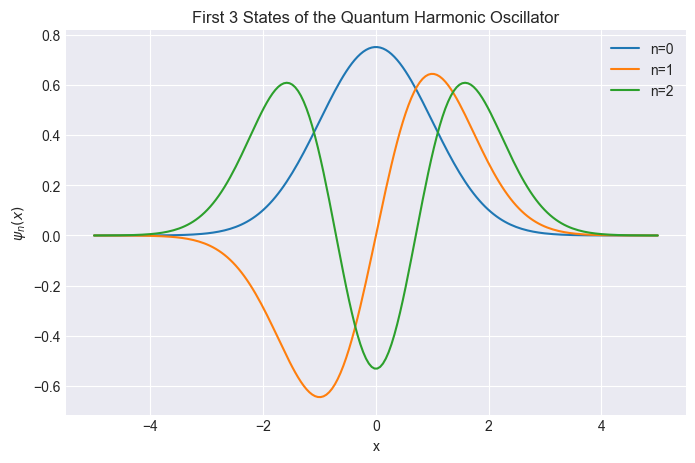

In [3]:
# EXERCISE: Implement the analytic wavefunction
from scipy.special import eval_hermite, factorial
import numpy as np

def psi_n_analytic(x, n):
    """
    Analytic wavefunction for the nth state of a quantum harmonic oscillator.
    Assumes m = omega = hbar = 1.
    """
    normalization = 1.0 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))
    return normalization * np.exp(-x**2 / 2.0) * eval_hermite(n, x)

x_vec = np.linspace(-5, 5, 200)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for n in range(3):
    plt.plot(x_vec, psi_n_analytic(x_vec, n), label=f'n={n}')

plt.title("First 3 States of the Quantum Harmonic Oscillator")
plt.xlabel("x")
plt.ylabel(r"$\psi_n(x)$")
plt.legend()
plt.grid(True)
plt.show()


### Interactive Exploration with Plotly
Static plots are okay, but interactive ones are better. Let's make a plot where you can use a slider to visualize different wavefunctions.

Don't worry about the details of the plotting code, focus on how the plot changes as you move the slider.

In [27]:
import numpy as np
import plotly.graph_objects as go
from scipy.special import eval_hermite
from math import factorial

def psi_n_analytic(x, n):
    """
    Analytic wavefunction for the nth state of a quantum harmonic oscillator.
    Assumes m = omega = hbar = 1.
    """
    normalization = 1.0 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))
    return normalization * np.exp(-x**2 / 2.0) * eval_hermite(n, x)

# Define domain
x_vec = np.linspace(-10, 10, 1000)
n_max = 20  # Max energy level for the slider

# 2. Pre-compute data for all steps
# This makes the slider interaction instant
data_cache = [psi_n_analytic(x_vec, n) for n in range(n_max)]

# 3. Create Figure
fig = go.Figure()

# Add the initial trace (n=0)
fig.add_trace(go.Scatter(
    x=x_vec,
    y=data_cache[0],
    name="Wavefunction",
    line=dict(color='royalblue', width=2),
    fill='tozeroy',  # Nice visual touch to show "area"
    fillcolor='rgba(65, 105, 225, 0.2)' # Semi-transparent blue
))

# 4. Create Slider Steps
steps = []
for n in range(n_max):
    step = dict(
        method="update",
        args=[
            {"y": [data_cache[n]]},  # Update the y-data of the trace
            {"title": f"Harmonic Oscillator Eigenstate: n = {n} (Energy = {n+0.5} ℏω)"}
        ],
        label=str(n)
    )
    steps.append(step)

# 5. Configure Layout with Slider
fig.update_layout(
    title=f"Harmonic Oscillator Eigenstate: n = 0 (Energy = 0.5 ℏω)",
    xaxis_title="Position (x)",
    yaxis_title="Amplitude ψ(x)",
    yaxis=dict(range=[-2, 2]), # Fixed range prevents jumping axes
    sliders=[dict(
        active=0,
        currentvalue={"prefix": "Energy Level (n): "},
        pad={"t": 50},
        steps=steps
    )],
    template="plotly_white"
)

fig.show()

---
## Part 5: Time Evolution

If we start in a superposition state $|\Psi(0)\rangle$, how does it evolve?
$$ |\Psi(t)\rangle = \hat{U}(t) |\Psi(0)\rangle = e^{-i\hat{H}t/\hbar} |\Psi(0)\rangle $$

Since we calculate $\hat{H}$ as a matrix, we can just exponentiate it!

In [ ]:
# EXERCISE: Evolve a superposition state
# 1. Define initial state psi0 = (|0> + |1>)/sqrt(2)
# 2. Compute U(t) for t = 2*pi (one full period)
# 3. Compute psi_final = U @ psi0
# 4. Plot the fidelity using plotly

# Hint: scipy.linalg.expm computes matrix exponential

In [ ]:
print(qp.basis.__doc__)

In [17]:
# Performing time evolution of a superposition state of a harmonic oscillator using QuTiP
# 1. Define initial state psi0 = (|0> + |1>)/sqrt(2)
# 2. Evaluate time evolution for one complete period
# 3. Plot the fidelity using plotly

import numpy as np
import qutip as qp
import plotly.graph_objects as go

# 1. Define System
N = 10  # Dimension of Hilbert space (sufficient for |0> and |1>)
a = qp.destroy(N)
H = a.dag() * a + 0.5 * qp.qeye(N)

# Time evolution for 2 full periods (Period T = 2*pi/omega, omega=1)
tlist = np.linspace(0, 4 * np.pi, 200)

def compute_fidelity(theta, phi=0):
    """Compute fidelity over time for a superposition state."""
    # Construct state: cos(theta/2)|0> + e^(i*phi)sin(theta/2)|1>
    c0 = np.cos(theta / 2.0)
    c1 = np.exp(1j * phi) * np.sin(theta / 2.0)
    psi0 = (c0 * qp.basis(N, 0) + c1 * qp.basis(N, 1)).unit()
    
    # Evolve state
    # Use sesolve for unitary evolution (faster for pure states than mesolve)
    result = qp.sesolve(H, psi0, tlist, [])
    
    # Calculate fidelity F(t) = |<psi0|psi(t)>|^2
    # Vectorized overlap calculation for speed
    overlaps = [psi0.overlap(state) for state in result.states]
    return np.abs(np.array(overlaps))**2

# 2. Pre-compute Slider Data
# Define theta range from 0 (|0>) to pi (|1>)
theta_vals = np.linspace(0, np.pi, 11)
initial_phi = 0

# Store all traces
all_traces = [compute_fidelity(t, initial_phi) for t in theta_vals]

# Initial setup (Start at middle index, theta = pi/2)
start_idx = 5 

# 3. Create Plotly Figure
fig = go.Figure()

# Add the initial trace
fig.add_trace(go.Scatter(
    x=tlist, 
    y=all_traces[start_idx], 
    mode='lines', 
    name='Fidelity',
    line=dict(width=3, color='royalblue')
))

# Create Slider Steps
steps = []
for i, theta in enumerate(theta_vals):
    step = dict(
        method="update",
        args=[
            {"y": [all_traces[i]]},  # Update the y-data of the trace
            {"title": f"Fidelity vs Time (Mixing Angle θ = {theta:.2f} rad)"} # Update Title
        ],
        label=f"{theta:.2f}"
    )
    steps.append(step)

# Layout Configuration
fig.update_layout(
    title=f"Fidelity vs Time (Mixing Angle θ = {theta_vals[start_idx]:.2f} rad)",
    xaxis_title="Time (t)",
    yaxis_title="Fidelity |⟨ψ(0)|ψ(t)⟩|²",
    template="plotly_white",
    
    # CRITICAL FIX: Fix Y-axis range to prevent zooming in on numerical noise
    yaxis=dict(range=[-0.1, 1.1]), 
    
    sliders=[dict(
        active=start_idx,
        currentvalue={"prefix": "Theta: "},
        pad={"t": 50},
        steps=steps
    )]
)

fig.show()

c:\Users\jerry\AppData\Local\Programs\Python\Python312\Lib\site-packages\qutip\solver\solver_base.py:598: FutureWarning:

e_ops will be keyword only from qutip 5.3 for all solver



How does the wavefunction of this superposition state look?

Once again, you can skip the details of this code.

In [28]:
import numpy as np
import qutip as qp
import plotly.graph_objects as go
from scipy.special import eval_hermite
from math import factorial

# --- 1. Physics Setup ---
# System parameters
N = 10                  # Hilbert space size
x_vec = np.linspace(-6, 6, 200)  # Position grid
tlist = np.linspace(0, 2*np.pi, 100) # One full period (T = 2pi)

# Define Operators & Hamiltonian
a = qp.destroy(N)
H = a.dag() * a + 0.5 * qp.qeye(N)

# Define Initial State: Equal superposition of |0> and |1>
# This creates the maximum "sloshing" effect
psi0 = (qp.basis(N, 0) + qp.basis(N, 1)).unit()

# Time Evolution
result = qp.sesolve(H, psi0, tlist, [])

# --- 2. Helper: Convert Fock Basis to Position Basis ---
def get_x_basis_matrix(x_grid, N_dim):
    """
    Creates a matrix where rows are the analytic eigenstates evaluated at x.
    Shape: (N_dim, len(x_grid))
    """
    basis_matrix = np.zeros((N_dim, len(x_grid)))
    for n in range(N_dim):
        # Analytic formula for QHO eigenstates (m=w=hbar=1)
        norm = 1.0 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))
        basis_matrix[n, :] = norm * eval_hermite(n, x_grid) * np.exp(-x_grid**2 / 2)
    return basis_matrix

# Precompute basis functions (Matrix M)
# We can find psi(x,t) by: psi(x,t) = M.T @ coeffs(t)
basis_x = get_x_basis_matrix(x_vec, N)

# --- 3. Generate Frames for Animation ---
frames = []
max_prob = 0 # Track max height for plotting

for i, t in enumerate(tlist):
    # Get coefficients c_n for current time step
    # result.states[i] is a Qobj, .full() gives the dense vector
    coeffs = result.states[i].full().flatten()
    
    # Calculate wavefunction: sum(c_n * psi_n(x))
    # Using matrix multiplication for speed
    psi_x = np.dot(coeffs, basis_x)
    
    # Probability Density
    prob_density = np.abs(psi_x)**2
    max_prob = max(max_prob, np.max(prob_density))
    
    frames.append(go.Frame(
        data=[go.Scatter(x=x_vec, y=prob_density)],
        name=str(i) # Name used for linking slider
    ))

# --- 4. Build the Plotly Figure ---
fig = go.Figure(
    data=[
        # Trace 0: The dynamic wavefunction (Start at t=0)
        go.Scatter(
            x=x_vec, 
            y=np.abs(np.dot(result.states[0].full().flatten(), basis_x))**2,
            mode='lines',
            name='Probability Density |ψ|²',
            line=dict(color='royalblue', width=3),
            fill='tozeroy',
            fillcolor='rgba(65, 105, 225, 0.3)'
        ),
        # Trace 1: The Potential Well (Static Background)
        # Scaled arbitrarily to fit the plot nicely
        go.Scatter(
            x=x_vec,
            y=0.5 * x_vec**2 * 0.15, # Scaled potential V(x)
            mode='lines',
            name='Potential V(x) (scaled)',
            line=dict(color='gray', dash='dash', width=1),
            hoverinfo='skip'
        )
    ],
    frames=frames
)

# --- 5. Add Controls (Play Button & Slider) ---
fig.update_layout(
    title="Time Evolution of Superposition: (|0⟩ + |1⟩)/√2",
    xaxis_title="Position (x)",
    yaxis_title="Probability Density",
    yaxis=dict(range=[0, max_prob * 1.2]), # Fix Y-axis to prevent jumping
    template="plotly_white",
    
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(
            label="Play",
            method="animate",
            args=[None, dict(frame=dict(duration=50, redraw=True), fromcurrent=True)]
        ),
        dict(
            label="Pause",
            method="animate",
            args=[[None], dict(frame=dict(duration=0, redraw=False), mode="immediate", transition=dict(duration=0))]
        )]
    )],
    
    sliders=[dict(
        steps=[dict(
            method='animate',
            args=[[str(k)], dict(mode='immediate', frame=dict(duration=0, redraw=True), transition=dict(duration=0))],
            label=f"{k}"
        ) for k in range(len(tlist))],
        currentvalue={"prefix": "Time Step: "}
    )]
)

fig.show()

c:\Users\jerry\AppData\Local\Programs\Python\Python312\Lib\site-packages\qutip\solver\solver_base.py:598: FutureWarning:

e_ops will be keyword only from qutip 5.3 for all solver



Question: 
If $\hat{H}$ is diagonal, then what is the matrix representation of $e^{i\hat{H}t/\hbar}$?

In such a case, is there an easier way to express the state at a later time t without explicitly exponentiating the matrix? Which method is computationally more efficient?

Now suppose our Hamiltonian is not diagonal. An example would be:

$\hat{H} = \begin{bmatrix}\hbar \omega_1 & \hbar \gamma \\ \hbar \gamma & \hbar \omega_2 \end{bmatrix} $

Now if you wanted to evolve the state ket $|\psi(0)\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ at time t, how would you do it? Find an efficient way to do it.

In [ ]:
# EXERCISE: Evolve for a non-diagonal Hamiltonian

# define the initial state psi0 = |0>
# define the Hamiltonian H = hbar * np.array([[omega_1, gamma], [gamma, omega_2]])

# define the time array t = np.linspace(0, 10, 1000)

# evolve using matrix exponentiation
# evolve using an alternate method 
# Hint: can diagonalization be helpful?

# look at the time taken for both methods

# plot the results and compare

## Conclusion
You've built a Quantum Harmonic Oscillator simulation from the ground up! You learned:
1. Representations of states and operators in Numpy.
2. How finite basis truncation affects commutation relations.
3. How QuTiP simplifies this workflow.
